In [35]:
# used for data manipulation and analysis.
import pandas as pd #data processing
# used for scientific computing in Python.
import numpy as np #linear_algebra
# used for data visualization in Python.
import matplotlib.pyplot as plt #visual
# is a built-upon Matplotlib that provides high-level statistical graphics.
import seaborn as sns #visual

#used for natural language processing (NLP) tasks.
import nltk
#This line imports the regular expressions (regex) library, which is used for searching, editing, or manipulating text.
import re
# used for feature extraction from text data.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# used for data preprocessing and encoding categorical data.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# used for stemming words (reducing words to their root form).
from nltk.stem import PorterStemmer
# is a list of common words that are often removed from text data before processing.
from nltk.corpus import stopwords
# used for tokenizing words and sentences from text data.
from nltk.tokenize import word_tokenize,sent_tokenize
# used for generating word clouds from text data.
from wordcloud import WordCloud,STOPWORDS

#machine learning preprocessing & classification models
from sklearn.model_selection import train_test_split
# precision: The fraction of true positives among all predicted positives.
# recall: The fraction of true positives among all actual positives.
# F1 score: The harmonic mean of precision and recall.
# support: The number of samples in each class.
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report
# imports the LogisticRegression class from the sklearn.linear_model module. 
# This class is used to fit logistic regression models, which are a type of statistical model that predicts the probability of a binary outcome.
from sklearn.linear_model import LogisticRegression
#imports the KNeighborsClassifier class from the sklearn.neighbors module. 
# This class is used to fit k-nearest neighbors (KNN) classifiers, which are a type of lazy learning algorithm. 
from sklearn.neighbors import KNeighborsClassifier
# imports the GaussianNB class from the sklearn.naive_bayes module. 
# This class is used to fit Gaussian Naive Bayes classifiers, which are a type of probabilistic classifier based on Bayes' theorem. 
# Gaussian Naive Bayes assumes that the features in the data are normally distributed.
from sklearn.naive_bayes import GaussianNB
# imports the SVC class from the sklearn.svm module. 
# This class is used to fit support vector machine (SVM) classifiers, which are a type of supervised learning algorithm used for 
# classification and regression tasks.
from sklearn.svm import SVC

In [2]:
# reads the CSV file,into a Pandas DataFrame called data
data=pd.read_csv('fake_job_postings.csv')
# prints the first 10 rows of the DataFrame
data.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [3]:
# function returns a Pandas DataFrame containing the data types of the columns in the original DataFrame data
data.dtypes.to_frame()

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


In [4]:
# These categories are relevant to identifying fraudulent job
categories=['telecommuting','has_company_logo','has_questions','employment_type','required_experience',
            'required_education','industry','function','fraudulent']

In [5]:
for i in categories:
     x=data[i].value_counts()
     print (x.to_frame())

               count
telecommuting       
0              17113
1                767
                  count
has_company_logo       
1                 14220
0                  3660
               count
has_questions       
0               9088
1               8792
                 count
employment_type       
Full-time        11620
Contract          1524
Part-time          797
Temporary          241
Other              227
                     count
required_experience       
Mid-Senior level      3809
Entry level           2697
Associate             2297
Not Applicable        1116
Director               389
Internship             381
Executive              141
                                   count
required_education                      
Bachelor's Degree                   5145
High School or equivalent           2080
Unspecified                         1397
Master's Degree                      416
Associate Degree                     274
Certification                        170
Some

In [6]:
# returns a Series containing the number of missing values for each column in the DataFrame data.
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
# fills in any missing values in the function column with the corresponding values in the department
#Removing undesired columns & nan 
# The inplace=True argument tells Pandas to modify the original DataFrame in place.
data.function.fillna(data.department,inplace=True)
data.drop(columns=['job_id','salary_range','department'],inplace=True)

In [8]:
# Now we need to handle missing values for text data and categorical data

text=['title','benefits','company_profile','location','description','requirements','fraudulent']

categ=['employment_type','required_experience','required_education','industry','function','telecommuting','has_company_logo','has_questions','fraudulent']

In [9]:
#filling nan in categorical data
categ_cols=data[categ].fillna('None')
categ_cols

,employment_type,required_experience,required_education,industry,function,telecommuting,has_company_logo,has_questions,fraudulent
0,Other,Internship,None,None,Marketing,0,1,0,0
1,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0,1,0,0
2,None,None,None,None,None,0,1,0,0
3,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,0,0
4,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,0
...,...,...,...,...,...,...,...,...,...
17875,Full-time,Mid-Senior level,None,Computer Software,Sales,0,1,1,0
17876,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,1,1,0
17877,Full-time,None,None,None,None,0,0,0,0
17878,Contract,Not Applicable,Professional,Graphic Design,Design,0,0,1,0


In [10]:
#filling nan in text data
txt_cols=data[text].fillna(' ')
txt_cols

,title,benefits,company_profile,location,description,requirements,fraudulent
0,Marketing Intern,,"We're Food52, and we've created a groundbreaki...","US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,What you will get from usThrough being part of...,"90 Seconds, the worlds Cloud Video Production ...","NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),,Valor Services provides Workforce Solutions th...,"US, IA, Wever","Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,Our culture is anything but corporate—we have ...,Our passion for improving quality of life thro...,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,Full Benefits Offered,SpotSource Solutions LLC is a Global Human Cap...,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0
...,...,...,...,...,...,...,...
17875,Account Director - Distribution,What can you expect from us?We have an open cu...,Vend is looking for some awesome new talent to...,"CA, ON, Toronto",Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,0
17876,Payroll Accountant,Health &amp; WellnessMedical planPrescription ...,WebLinc is the e-commerce platform and service...,"US, PA, Philadelphia",The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,0
17877,Project Cost Control Staff Engineer - Cost Con...,,We Provide Full Time Permanent Positions for m...,"US, TX, Houston",Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,0
17878,Graphic Designer,Competitive salary (compensation will be based...,,"NG, LA, Lagos",Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,0


In [11]:
# The lambda function splits the location string on the comma character and returns the first element, which is the country code.
categ_cols['country']=txt_cols['location'].apply(lambda x:x.split(',')[0])
# countries contains the number of job postings from each country.
countries=categ_cols['country'].value_counts().to_frame()
countries

,count
country,
US,10656
GB,2384
GR,940
CA,457
DE,383
...,...
SI,1
CO,1
SD,1


In [12]:
# counts the number of job postings that are fraudulent and non-fraudulent
data['fraudulent'].value_counts().to_frame()

,count
fraudulent,
0,17014
1,866


([<matplotlib.patches.Wedge at 0x1e65132a850>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Real Job'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fake Job')],
 [Text(-0.593067594899332, 0.09094409205837257, '95%'),
  Text(0.5930675906419312, -0.09094411982187034, '5%')])

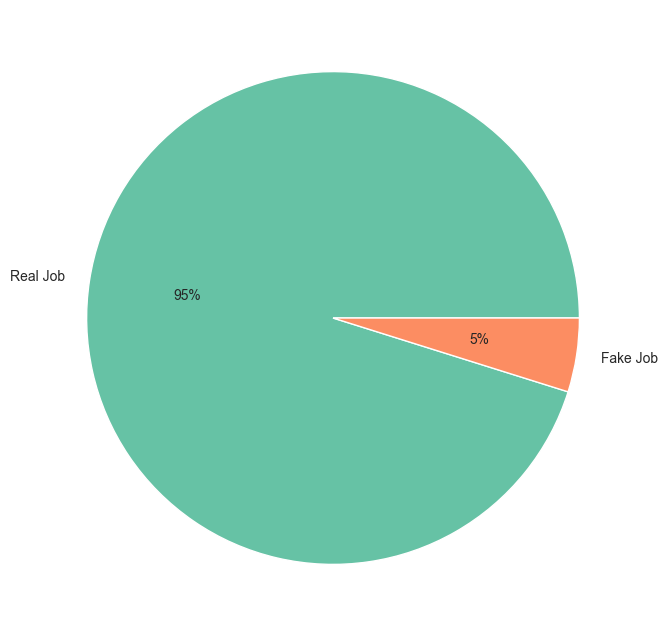

In [13]:
# function returns a list of 10 colors from the Set2 color palette. These colors will be used to color the pie slices.
colors = sns.color_palette('Set2')[0:10]
labels=['Real Job','Fake Job']
# creates a new figure with a size of 10 inches by 8 inches.
plt.figure(figsize=(10,8))
# sets the style of the plot to whitegrid. This style uses a white background with a light gray grid.
sns.set_style('whitegrid')
# The autopct argument specifies the format of the text displayed on the pie slices. 
#In this case, the text will display the percentage of each slice, rounded to the nearest integer.
plt.pie(data['fraudulent'].value_counts(),labels=labels,colors=colors,autopct='%.0f%%')

In [14]:
exp_list=['Executive','Associate','Director','Mid-Senior level']
# Filter the categorical features DataFrame to only include rows where the required_experience column is in the exp_list list
exp_data=categ_cols.loc[categ_cols['required_experience'].isin(exp_list)]

In [15]:
exp_data_indus=exp_data.groupby('industry')['required_experience'].value_counts(ascending=False).to_frame()
exp_data_indus.head(30)

count
industry                required_experience       
Accounting              Associate               25
                        Mid-Senior level        14
                        Executive                1
                        Director                 1
Airlines/Aviation       Mid-Senior level        23
                        Associate               10
                        Executive                3
                        Director                 1
Animation               Associate                1
Apparel & Fashion       Mid-Senior level        36
                        Associate                9
                        Director                 6
Architecture & Planning Mid-Senior level         3
                        Associate                2
Automotive              Mid-Senior level        32
                        Associate               21
                        Director                 1
                        Executive                1
Aviation & Aerospace    Mid-Senior level         8
                        Director                 5
                        Associate                5
Banking                 Associate               32
                        Mid-Senior level        29
                        Director                 2
                        Executive                1
Biotechnology           Associate               14
                        Mid-Senior level        11
                        Director                 1
Broadcast Media         Mid-Senior level        43
                        Associate                4

In [16]:
categ_cols.groupby('industry')['required_education'].value_counts(ascending=False).to_frame().head(50)

count
industry                       required_education                      
Accounting                     None                                  71
                               Bachelor's Degree                     35
                               High School or equivalent             29
                               Unspecified                           15
                               Certification                          4
                               Professional                           2
                               Master's Degree                        2
                               Some College Coursework Completed      1
Airlines/Aviation              None                                  33
                               Bachelor's Degree                     22
                               Unspecified                            4
                               High School or equivalent              3
                               Master's Degree                        1
Alternative Dispute Resolution Vocational                             1
Animation                      None                                   3
                               Certification                          1
                               Unspecified                            1
Apparel & Fashion              None                                  44
                               Bachelor's Degree                     34
                               Unspecified                            9
                               Associate Degree                       5
                               High School or equivalent              3
                               Vocational                             1
                               Master's Degree                        1
Architecture & Planning        Bachelor's Degree                      6
                               None                                   4
Automotive                     High School or equivalent             30
                               Bachelor's Degree                     28
                               Unspecified                           26
                               None                                  25
                               Associate Degree                       8
                               Some College Coursework Completed      1
                               Master's Degree                        1
                               Vocational                             1
Aviation & Aerospace           Bachelor's Degree                     10
                               None                                   6
                               Master's Degree                        5
                               Professional                           2
                               Unspecified                            1
Banking                        High School or equivalent             33
                               Bachelor's Degree                     21
                               None                                  13
                               Unspecified                            6
                               Master's Degree                        5
                               Professional                           3
                               Some College Coursework Completed      1
                               Associate Degree                       1
                               Doctorate                              1
Biotechnology                  Bachelor's Degree                     20
                               Unspecified                            5

In [17]:
# As we used Country in location column as a category data
cols_to_remove=['location']
txt_cols.drop(columns=cols_to_remove,inplace=True) 

In [18]:
#  The PorterStemmer object is used to stem words, which means that it removes common suffixes from words.
stemmer=PorterStemmer()
# Stop words are common words that are often removed from text before it is processed by a machine learning algorithm.
stop=set(stopwords.words('english'))

In [19]:
def column_clean(text):
    # Lowercase the text.
    text = text.lower()
    # Remove all non-alphanumeric characters.
    text = re.sub('[^a-zA-Z\s*]','',text)
    # Split the text into a list of words.
    text=text.split()
    # Stem each word in the list, Remove stop words from the list, Return the cleaned list of words.
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return (text)

In [20]:
# Splitting Text Data to Fraud or Not Fraud
txt_fraud=txt_cols[txt_cols['fraudulent']==1]
txt_not_fraud=txt_cols[txt_cols['fraudulent']==0]

In [21]:
data=txt_cols.join(categ_cols.drop(columns='fraudulent'))

In [22]:
data['text']=data['title'] +' '+data['benefits']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']
colm=['title','benefits','company_profile','description','requirements']
data.drop(columns=colm,inplace=True)


In [23]:
# contains all of the columns in the data except for the fraudulent column.
x=data.drop(columns='fraudulent')
# contains the fraudulent column.
y=data['fraudulent']

In [24]:
# Applying Count Vectorizer
count_vec = CountVectorizer(max_features=5000)
# transform text column into a sparse matrix using CountVectorizer object.
vec = count_vec.fit_transform(data['text'])
# A sparse matrix is a type of matrix that is mostly empty. 
# This is because most words do not occur in most text documents. 
# Sparse matrices are used to store text data efficiently because they only store the non-zero values.

In [25]:
# converts the sparse matrix vec into a Pandas DataFrame called text.
# toarray() method on the sparse matrix vec converts the sparse matrix into a dense matrix.
text=pd.DataFrame(vec.toarray(),columns=count_vec.get_feature_names_out())

In [26]:
# contains the one-hot encoded categorical features from the x DataFrame.
# One-hot encoding is a technique for converting categorical features into numerical features. 
# This is necessary because machine learning algorithms cannot understand categorical features directly
labels=pd.get_dummies(x.drop(columns='text'))
result = pd.concat([labels, text], axis=1)
# axis=0 refers to rows, and axis=1 refers to columns.

In [27]:
# Splitting data to train and test
# x_train : The training set features.
# x_test : The test set features.
# y_train : The training set labels.
# y_test : The test set labels.
# random_state : ensures that the split is reproducible.
# stratify : means that the training and test sets will have the same proportion of labels as the original dataset.
x_train,x_test,y_train,y_test=train_test_split(result,y,test_size=0.2,random_state=42,stratify=y)

In [28]:
# Logistic Regression
# The LogisticRegression class is a supervised machine learning algorithm that can be used for classification tasks. 
# It works by learning a relationship between the features in the data and the labels. 
# Once the model is trained, it can be used to make predictions on new data.
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)

C:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print('        Training Classification report for Logistic Regression \n',classification_report(y_train,lr.predict(x_train)))
print('        Testing Classification Report for Logistion Regression \n',classification_report(y_test,lr_y_pred))

        Training Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Logistion Regression 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.91      0.80      0.85       173

    accuracy                           0.99      3576
   macro avg       0.95      0.90      0.92      3576
weighted avg       0.99      0.99      0.99      3576



In [30]:
# KNN
# The KNeighborsClassifier class is a supervised machine learning algorithm that can be used 
# for both classification and regression tasks. It works by finding the K most similar data points 
# to a new data point and then predicting the label (or value) for the new data point based on the labels (or values) of the K most similar data points.
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_y_pred=knn.predict(x_test)

In [31]:
print('        Training Classification report for KNN \n',classification_report(y_train,knn.predict(x_train)))
print('        Testing Classification Report for KNN \n',classification_report(y_test,knn_y_pred))

        Training Classification report for KNN 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     13611
           1       0.82      0.73      0.77       693

    accuracy                           0.98     14304
   macro avg       0.90      0.86      0.88     14304
weighted avg       0.98      0.98      0.98     14304

        Testing Classification Report for KNN 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3403
           1       0.80      0.65      0.72       173

    accuracy                           0.98      3576
   macro avg       0.89      0.82      0.85      3576
weighted avg       0.97      0.98      0.97      3576



In [32]:
# SVM (Support Vector Machine)
# Support Vector Machines (SVMs) are a versatile class of supervised learning algorithms used for classification and regression tasks. 
# They are known for their effectiveness in high-dimensional spaces and their ability to handle non-linear relationships between features.
sVm= SVC()
sVm.fit(x_train,y_train)
sVm_y_pred=sVm.predict(x_test)

In [33]:
print('        Training Classification report for svm \n',classification_report(y_train,sVm.predict(x_train)))
print('        Testing Classification Report for svm \n',classification_report(y_test,sVm_y_pred))

        Training Classification report for svm 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     13611
           1       1.00      0.45      0.62       693

    accuracy                           0.97     14304
   macro avg       0.99      0.72      0.80     14304
weighted avg       0.97      0.97      0.97     14304

        Testing Classification Report for svm 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       1.00      0.44      0.61       173

    accuracy                           0.97      3576
   macro avg       0.99      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576



In [36]:
# Naive Bayes
# Gaussian Naive Bayes (GNB) is a probabilistic classifier based on Bayes' theorem. 
# It assumes that the features in the data are normally distributed, and it uses this assumption to calculate the 
# probability that a new data point belongs to a particular class. GNB is a simple and effective algorithm that is often used for 
# classification tasks where the features are continuous and normally distributed.
nb= GaussianNB()
nb.fit(x_train, y_train)
nb_y_pred = nb.predict(x_test)

In [37]:
print('        Training Classification report for Naive Bayes \n',classification_report(y_train,nb.predict(x_train)))
print('        Testing Classification Report for Naive Bayes \n',classification_report(y_test,nb_y_pred))

        Training Classification report for Naive Bayes 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     13611
           1       0.60      1.00      0.75       693

    accuracy                           0.97     14304
   macro avg       0.80      0.98      0.87     14304
weighted avg       0.98      0.97      0.97     14304

        Testing Classification Report for Naive Bayes 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.58      0.76      0.66       173

    accuracy                           0.96      3576
   macro avg       0.78      0.87      0.82      3576
weighted avg       0.97      0.96      0.96      3576



In [41]:
# The function models() takes the training data features and labels as input and returns four machine learning models: 
# Logistic Regression, K-Nearest Neighbors, Decision Tree, and Random Forest. 
# The function also prints the training accuracy of each model.
def models(x_train, y_train):
    # Create a Logistic Regression model
    lr=LogisticRegression()
    # Fit the model to the training data
    lr.fit(x_train,y_train)
    print('[0]Logistic Regression Training Accuracy:', lr.score(x_train, y_train))

    # Create a K-Nearest Neighbors model
    knn= KNeighborsClassifier()
    # Fit the model to the training data
    knn.fit(x_train,y_train)
    print('[1]KNeighbors Training Accuracy:', knn.score(x_train, y_train))

    sVm= SVC()
    sVm.fit(x_train, y_train)
    print('[2]Support Vector Machine Training Accuracy:', sVm.score(x_train, y_train))

    nb = GaussianNB()
    nb.fit(x_train, y_train)
    print('[3]Naive Bayes Training Accuracy:', nb.score(x_train, y_train))

    # Create a Decision tree model
    # dt=DecisionTreeClassifier()
    # # Fit the model to the training data
    # dt.fit(x_train,y_train)
    # print('[2]Decesion Tree Training Accuracy:', dt.score(x_train, y_train))

    # Create a Random Forest model
    # rf=RandomForestClassifier()
    # # Fit the model to the training data
    # rf.fit(x_train,y_train)
    # print('[3]Random Forest Training Accuracy:', rf.score(x_train, y_train))
    
    return lr, knn, sVm, nb

In [42]:
model = models(x_train, y_train)

C:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]Logistic Regression Training Accuracy: 0.9998601789709173
[1]KNeighbors Training Accuracy: 0.9789569351230425
[2]Support Vector Machine Training Accuracy: 0.9731543624161074
[3]Naive Bayes Training Accuracy: 0.9672818791946308


In [40]:
# Test model accuracy on test data on confusion matrix.

for i in range(len(model)):
    # Print the model name
    print('Model', i)
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, model[i].predict(x_test))

    # Extract the true positives, true negatives, false positives, false negatives from the confusion matrix.
    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    # Print the Confusion matrix
    print(cm)
    # Compute the testing accuracy
    print('Testing Accuracy = ', (TP + TN)/(TP + TN + FN + FP))
    print()

Model 0
[[3389   14]
 [  34  139]]
Testing Accuracy =  0.9865771812080537

Model 1
[[3375   28]
 [  61  112]]
Testing Accuracy =  0.9751118568232662

Model 2
[[3403    0]
 [  97   76]]
Testing Accuracy =  0.9728747203579419

Model 3
[[3306   97]
 [  41  132]]
Testing Accuracy =  0.9614093959731543

